In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import and_ # import and_ method
import datetime as dt
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [4]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [5]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [6]:
# Assign the measurement class to a variable called `Measurement`
Measurement = Base.classes.measurement

In [7]:
# Assign the station class to a variable called `Station`
Station = Base.classes.station

In [8]:
# Create a session
session = Session(engine)

In [9]:
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [10]:
# Latest Date
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [11]:
# Choosing start date 2014-02-28 to end date 2014-03-10
session.query(Measurement.date).filter(and_(Measurement.date >= '2014-02-28', Measurement.date <= '2014-03-10')).order_by(Measurement.date).all()

[('2014-02-28'),
 ('2014-02-28'),
 ('2014-02-28'),
 ('2014-02-28'),
 ('2014-02-28'),
 ('2014-02-28'),
 ('2014-02-28'),
 ('2014-02-28'),
 ('2014-03-01'),
 ('2014-03-01'),
 ('2014-03-01'),
 ('2014-03-01'),
 ('2014-03-01'),
 ('2014-03-01'),
 ('2014-03-01'),
 ('2014-03-02'),
 ('2014-03-02'),
 ('2014-03-02'),
 ('2014-03-02'),
 ('2014-03-02'),
 ('2014-03-02'),
 ('2014-03-03'),
 ('2014-03-03'),
 ('2014-03-03'),
 ('2014-03-03'),
 ('2014-03-03'),
 ('2014-03-03'),
 ('2014-03-03'),
 ('2014-03-03'),
 ('2014-03-04'),
 ('2014-03-04'),
 ('2014-03-04'),
 ('2014-03-04'),
 ('2014-03-04'),
 ('2014-03-04'),
 ('2014-03-04'),
 ('2014-03-04'),
 ('2014-03-05'),
 ('2014-03-05'),
 ('2014-03-05'),
 ('2014-03-05'),
 ('2014-03-05'),
 ('2014-03-05'),
 ('2014-03-05'),
 ('2014-03-05'),
 ('2014-03-06'),
 ('2014-03-06'),
 ('2014-03-06'),
 ('2014-03-06'),
 ('2014-03-06'),
 ('2014-03-06'),
 ('2014-03-06'),
 ('2014-03-06'),
 ('2014-03-07'),
 ('2014-03-07'),
 ('2014-03-07'),
 ('2014-03-07'),
 ('2014-03-07'),
 ('2014-03-07'

In [12]:
# convert lastest_date to date time object
latest_date = datetime.strptime(str(latest_date[0]), '%Y-%m-%d').date()
latest_date

datetime.date(2017, 8, 23)

In [13]:
# date 1 year ago from latest_date
year_ago = latest_date - dt.timedelta(days=365)

In [14]:
# convert year ago to string
year_ago_str = year_ago.strftime("%Y-%m-%d")

In [15]:
# get all year ago results
year_ago_measurement = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= year_ago_str).order_by(Measurement.date).all()
year_ago_measurement

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [16]:
# load query into pandas data frame
df = pd.DataFrame(year_ago_measurement, columns=['date', 'prcp'])
df.head(10)

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
5,2016-08-23,1.79
6,2016-08-23,0.70
7,2016-08-24,0.08
8,2016-08-24,2.15
9,2016-08-24,2.28


In [17]:
df = df.dropna()
df.head(10)

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79
6,2016-08-23,0.70
7,2016-08-24,0.08
8,2016-08-24,2.15
9,2016-08-24,2.28
11,2016-08-24,1.22


In [18]:
df.set_index('date', inplace=True)
df.head(5)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


In [ ]:
df = df.sort_values(by=['date'], ascending=True)
df.head()

In [19]:
new_df = df.groupby(pd.to_datetime(df.index).strftime('%Y-%m'))['prcp'].mean()
new_df



2016-08    0.392642
2016-09    0.285549
2016-10    0.121620
2016-11    0.120234
2016-12    0.199494
2017-01    0.070294
2017-02    0.241111
2017-03    0.175266
2017-04    0.321111
2017-05    0.151317
2017-06    0.120000
2017-07    0.134773
2017-08    0.063951
Name: prcp, dtype: float64

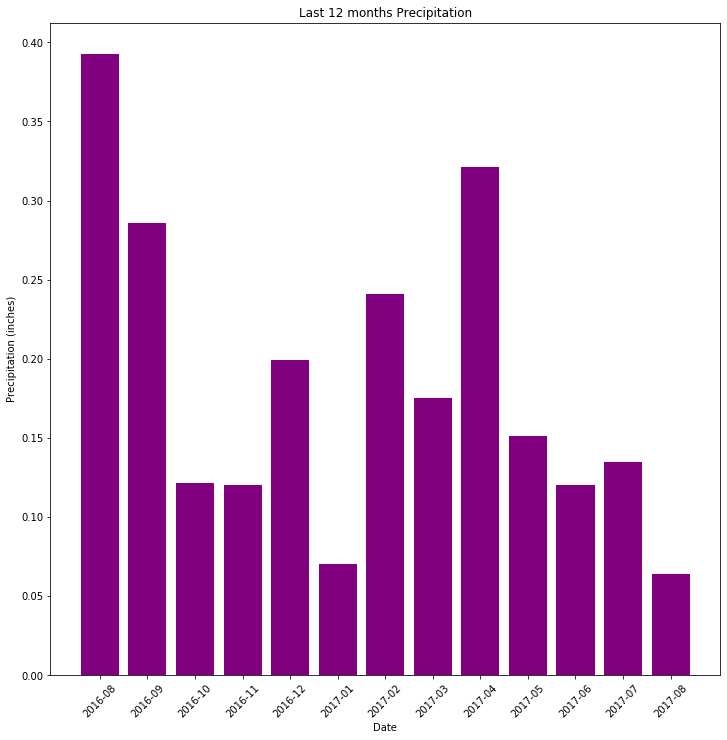

In [21]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(new_df.index,
        new_df,
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Last 12 months Precipitation")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [22]:
new_df.describe()

count    13.000000
mean      0.184412
std       0.099626
min       0.063951
25%       0.120234
50%       0.151317
75%       0.241111
max       0.392642
Name: prcp, dtype: float64